In [1]:
import json
import numpy as np
import tensorflow.keras as keras
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# DATASET_PATH = "data.json"

# def load_data(dataset_path):
#     with open(dataset_path, "r") as fp:
#         data = json.load(fp)

#     # convert list into numpy arrays
#     X = np.array(data['mfcc'])
#     y = np.array(data['labels'])
    
#     print("Data successfully loaded")
    
#     return X, y

In [2]:

with open("dataWS.json", "r") as fp:
    data = json.load(fp)

    # convert list into numpy arrays
    X = np.array(data['mfcc'])
    y = np.array(data['labels'])

In [3]:
data['mapping']

['risso dolphin',
 'white sided dolphin',
 'false killer whale',
 'killer whale',
 'humpback whale',
 'sperm whale',
 'bowhead whale']

In [4]:
np.uniqueeue(data['labels'])

array([0, 1, 3, 4, 5, 7, 8])

In [5]:
test = np.array(data['labels'])
np.unique(test, return_counts=True)
test1 = np.where(test == 3, 2,test)
test2 = np.where(test1 == 4, 3,test1)

np.unique(test2, return_counts=True)

(array([0, 1, 2, 3, 5, 7, 8]), array([670, 550, 590, 700, 640, 740, 600]))

In [6]:
test3 = np.where(test2 == 5, 4,test2)
np.unique(test3, return_counts=True)

(array([0, 1, 2, 3, 4, 7, 8]), array([670, 550, 590, 700, 640, 740, 600]))

In [8]:
test4 = np.where(test3 == 7, 5,test3)
np.unique(test4, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 8]), array([670, 550, 590, 700, 640, 740, 600]))

In [9]:
test5 = np.where(test4 == 8, 6,test4)
np.unique(test5, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([670, 550, 590, 700, 640, 740, 600]))

In [ ]:
test6 = np.where(test5 == 12, 6,test5)
np.unique(test6, return_counts=True)

In [ ]:
test7 = np.where(test6 == 14, 7,test6)
y2 = np.unique(test7, return_counts=True)

In [ ]:
y2

In [10]:
def prepare_datasets(X, y2, test_size, validation_size):
    
    # load in the data
#     X, y = load_data(DATASET_PATH)
    
    # create the train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=test_size)
    
    # create the train/validation split
    
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    
    # Tensorflow for CNN expect a 3D array -> (130, 13, 1) audio grayscale images
    X_train = X_train[..., np.newaxis] # 4d array -> (num of samples, 130, 13, 1)
    X_validation = X_validation[..., np.newaxis] 
    X_test = X_test[..., np.newaxis] 
    
    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [11]:
# create train, validation and test sets

X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(X, test5, 0.25, 0.2) # test size, vailidation size

# Build the model

In [12]:

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [13]:
def build_model(input_shape):
    
    # Instantiate model
    model = keras.Sequential()
    
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization()) # normalizes the activation at the layer, speeds up training
              
    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())
                  
              
    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2, 2), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())
              
    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten()) # flatten conv output
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3)) # randomly drops neurons
            
    # output layer that uses softmax
    model.add(keras.layers.Dense(7, activation='softmax')) # number of neurons of the classifications we want to predict
    
    print(model.summary())
    
    return model

In [14]:
# build the cnn net
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
model = build_model(input_shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 1, 32)         4

In [15]:
# compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

Epoch 1/30
85/85 [==============================] - 3s 31ms/step - loss: 1.5448 - accuracy: 0.4616 - val_loss: 1.3897 - val_accuracy: 0.4866
Epoch 2/30
85/85 [==============================] - 2s 23ms/step - loss: 0.9089 - accuracy: 0.6925 - val_loss: 0.9054 - val_accuracy: 0.6840
Epoch 3/30
85/85 [==============================] - 2s 24ms/step - loss: 0.6588 - accuracy: 0.7843 - val_loss: 0.5923 - val_accuracy: 0.8175
Epoch 4/30
85/85 [==============================] - 2s 24ms/step - loss: 0.5143 - accuracy: 0.8303 - val_loss: 0.3961 - val_accuracy: 0.8828
Epoch 5/30
85/85 [==============================] - 2s 23ms/step - loss: 0.4096 - accuracy: 0.8682 - val_loss: 0.3540 - val_accuracy: 0.8709
Epoch 6/30
85/85 [==============================] - 2s 23ms/step - loss: 0.3327 - accuracy: 0.8927 - val_loss: 0.2259 - val_accuracy: 0.9288
Epoch 7/30
85/85 [==============================] - 2s 24ms/step - loss: 0.2955 - accuracy: 0.9090 - val_loss: 0.1767 - val_accuracy: 0.9555
Epoch 8/30
85

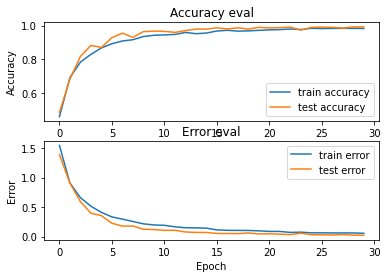

In [16]:
# Train the cnn 
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

# plot accuracy/error for training and validation
plot_history(history)

In [17]:
# evaluate the cnn on the test set

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

36/36 [==============================] - 0s 6ms/step - loss: 0.0225 - accuracy: 0.9938
Accuracy on test set is: 0.993766725063324


In [18]:
def predict(model, X, y):
    X = X[np.newaxis, ...] # to put make a 4D
    
    # prediction = [ [0.1, 0.2, ...] ] result of the softmax
    prediction = model.predict(X) # X -> (130, 13, 1) but expect 4D i.e num samples (1, 130, 13, 1)
    
    # extract the index with the max value
    predicted_index = np.argmax(prediction, axis=1) # [idx] 
    print("Expected index: {}, Predicted index: {}".format(y, predicted_index))
#     print(X.shape)
    

In [19]:
# make a prediction on a sample
X = X_test[65]
y = y_test[65]

predict(model, X, y)

Expected index: 4, Predicted index: [4]


In [20]:
print(data['mapping'])

['risso dolphin', 'white sided dolphin', 'false killer whale', 'killer whale', 'humpback whale', 'sperm whale', 'bowhead whale']


# Test unseen audio

In [21]:
with open("test_samps/humpback.json", "r") as fp:
    data2 = json.load(fp)

    # convert list into numpy arrays
    X3 = np.array(data2['mfcc'])

In [22]:
t = X3[:, ...]
X5 = t[..., np.newaxis]

In [23]:
X5.shape

(10, 130, 13, 1)

In [24]:
predict(model, X5[1], 4) # test 0 - 9 segments of mfccs

Expected index: 4, Predicted index: [4]


In [25]:
prediction = model.predict(X5)
predicted_index = np.argmax(prediction, axis=1) # predict all the segments at once

In [26]:
prediction

array([[3.17998114e-03, 3.09666723e-01, 5.33947051e-02, 4.34903383e-01,
        1.63063809e-01, 3.57146375e-02, 7.66980811e-05],
       [5.31659788e-03, 2.84123025e-03, 2.17704583e-04, 1.21253684e-01,
        6.50529146e-01, 2.17361182e-01, 2.48040189e-03],
       [5.87796443e-04, 5.93346020e-04, 2.26805751e-05, 2.00216286e-02,
        9.45056617e-01, 3.29201743e-02, 7.97718181e-04],
       [6.15526969e-03, 1.47022633e-02, 2.19304790e-03, 1.88593537e-01,
        6.12068355e-01, 1.63903773e-01, 1.23836854e-02],
       [1.30850552e-02, 5.55217639e-03, 1.07567653e-03, 5.26934639e-02,
        7.79257774e-01, 1.42325923e-01, 6.00994192e-03],
       [5.79292048e-03, 7.82383792e-03, 6.93156850e-04, 1.55954808e-01,
        4.96003509e-01, 3.29796880e-01, 3.93487699e-03],
       [2.71440740e-03, 1.19009269e-02, 2.25871554e-04, 8.36253911e-02,
        5.83689332e-01, 3.16970795e-01, 8.73304438e-04],
       [2.05317419e-03, 1.75516668e-03, 5.50486147e-04, 7.47793838e-02,
        7.08630621e-01, 1

In [27]:
predicted_index # 90% accurate on unseen audio at 6-8 dB lower than the training data.

array([3, 4, 4, 4, 4, 4, 4, 4, 5, 4])

In [ ]:
  # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)